In [1]:
# From Python
# It requires OpenCV installed for Python
import sys
import cv2
import os
from sys import platform
import argparse
import numpy as np

sys.path.append('/usr/local/python')
from openpose import pyopenpose as op

In [4]:
video_path = "/home/inutard/remote-disk/badminton-vids/kento/can-jonatan-christie-beat-kento-momota-jonatan-christie-vs-kento-momota-86-lars50h4.mp4"

cap = cv2.VideoCapture(video_path)
if cap.isOpened() is False:
    print('Error opening video stream or file')

fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # float `width`
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # float `height`
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
vidout = cv2.VideoWriter('test.mp4', fourcc, fps, (width, height))

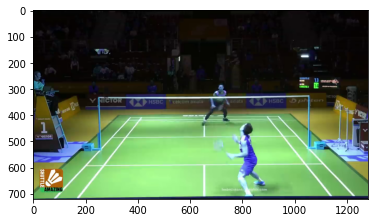

In [7]:
import matplotlib.pyplot as plt

ret_val, image = cap.read()
plt.imshow(image)

In [8]:
# image_path = "/home/inutard/openpose/examples/media/COCO_val2014_000000000192.jpg"
# imageToProcess = cv2.imread(image_path)
# plt.imshow(imageToProcess)
# plt.show()

In [9]:
# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "/home/inutard/openpose/models/"
# params["video"] = "/home/inutard/openpose/examples/media/video.avi"
params["num_gpu"] = 1
params["number_people_max"] = 1
params["net_resolution"] = "-1x400"
params["num_gpu_start"] = 0
params["disable_blending"] = False
params["body"] = 1
params["tracking"] = 0
# params["display"] = 0

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

In [16]:
# Process Image
datums = []
keypoints = []
for i in range(int(50 * fps)):
    if i % int(fps) == 0:
        print("At second {}".format(i/fps))

    # Grab frame and forward to openpose
    datums.append(op.Datum())
    ret_val, image = cap.read()
    datums[-1].cvInputData = image
    opWrapper.emplaceAndPop(op.VectorDatum([datums[-1]]))    

At second 0.0
At second 1.0
At second 2.0
At second 3.0
At second 4.0
At second 5.0
At second 6.0
At second 7.0
At second 8.0
At second 9.0
At second 10.0
At second 11.0
At second 12.0
At second 13.0


KeyboardInterrupt: 

In [17]:
for datum in datums:
    vidout.write(datum.cvOutputData)
    keypoints.append(datum.poseKeypoints)
    
vidout.release()

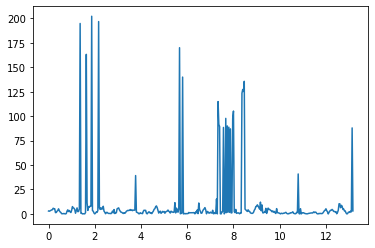

In [18]:
# Plot distance between adjacent frames of non-zero keypoints
def centroid(kp):
    s = np.sum(kp[0], axis=0) / np.count_nonzero(np.sum(keypoints[0][0], axis=1))
    return s

c = [centroid(kp) for kp in keypoints]

x, f = [], []
L = 1
for i in range(len(c)-L):
    f.append(np.linalg.norm(np.median(c[i:i+L]) - np.median(c[i+1:i+1+L])))
    x.append(i/fps)
    
plt.plot(x, f)

Body keypoints: 
[[[601. 298.   1.]
  [606. 317.   1.]
  [589. 316.   1.]
  [561. 328.   1.]
  [577. 315.   1.]
  [619. 315.   1.]
  [632. 341.   1.]
  [634. 361.   1.]
  [600. 367.   1.]
  [587. 364.   1.]
  [566. 389.   1.]
  [558. 427.   1.]
  [611. 368.   1.]
  [631. 399.   1.]
  [652. 430.   1.]
  [601. 294.   1.]
  [606. 294.   1.]
  [599. 294.   1.]
  [615. 301.   1.]
  [657. 444.   1.]
  [661. 443.   1.]
  [652. 430.   1.]
  [552. 437.   1.]
  [543. 433.   1.]
  [560. 429.   1.]]]


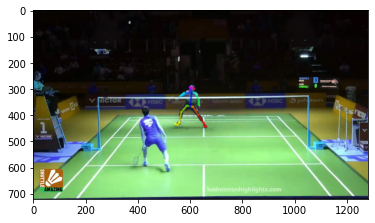

In [19]:
print("Body keypoints: \n" + str(datum.poseKeypoints))
plt.imshow(datum.cvOutputData)
plt.show()